## Python Data Science with pandas
Source From <a href='https://www.youtube.com/watch?v=ikOEn8jY2Is&list=PLyQnbMWK6HUUgr9FmrkkuUl3ts7o7T7r4&index=58&t=0s'>Here</a>
Data science is the fastest-growing segment of the Python community and Python is the de-facto language in data science. Well-known speaker and author Matt Harrison joins us to discuss pandas, the hot-topic Python library for data science, and how to use it in a sample application.

Matt  provides a walkthrough through some of the features of pandas: data ingestion, cleaning, and adding columns. As a demo application to show Python and data science, Matt will analyze bitcoin price data, making a simple model to show whether the price of bitcoin would rise or fall.

Contents
* [03:34  Introduction to Jupyter](https://www.youtube.com/watch?v=ikOEn8jY2Is&list=PLyQnbMWK6HUUgr9FmrkkuUl3ts7o7T7r4&index=57&t=214s)
* [06:43  pandas and matplotlib](https://www.youtube.com/watch?v=ikOEn8jY2Is&list=PLyQnbMWK6HUUgr9FmrkkuUl3ts7o7T7r4&index=57&t=403s)
* [08:20  Read/view bitcoin csv data](https://www.youtube.com/watch?v=ikOEn8jY2Is&list=PLyQnbMWK6HUUgr9FmrkkuUl3ts7o7T7r4&index=57&t=500s)
* [12:24  Setting index](https://www.youtube.com/watch?v=ikOEn8jY2Is&list=PLyQnbMWK6HUUgr9FmrkkuUl3ts7o7T7r4&index=57&t=744s)
* [15:00  Aggregation](https://www.youtube.com/watch?v=ikOEn8jY2Is&list=PLyQnbMWK6HUUgr9FmrkkuUl3ts7o7T7r4&index=57&t=900s)
* [17:10  Slicing](https://www.youtube.com/watch?v=ikOEn8jY2Is&list=PLyQnbMWK6HUUgr9FmrkkuUl3ts7o7T7r4&index=57&t=1030s)
* [18:40  Computed columns with assign](https://www.youtube.com/watch?v=ikOEn8jY2Is&list=PLyQnbMWK6HUUgr9FmrkkuUl3ts7o7T7r4&index=57&t=1120s)
* [21:30  Questions](https://www.youtube.com/watch?v=ikOEn8jY2Is&list=PLyQnbMWK6HUUgr9FmrkkuUl3ts7o7T7r4&index=57&t=1290s)
* [33:10  Random forest](https://www.youtube.com/watch?v=ikOEn8jY2Is&list=PLyQnbMWK6HUUgr9FmrkkuUl3ts7o7T7r4&index=57&t=1990s)
* [40:00  ROC Curve](https://www.youtube.com/watch?v=ikOEn8jY2Is&list=PLyQnbMWK6HUUgr9FmrkkuUl3ts7o7T7r4&index=57&t=2400s)
* 42:55  PyCharm
* [49:20  Questions](https://www.youtube.com/watch?v=ikOEn8jY2Is&list=PLyQnbMWK6HUUgr9FmrkkuUl3ts7o7T7r4&index=57&t=2960s)

Matt will put some material in his GitHub account: https://github.com/mattharrison

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble, model_selection, preprocessing, tree
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

Data is from <b><a href='https://www.kaggle.com/mczielinski/bitcoin-historical-data/data#'>Kaggle Bitcoin Historical Data</a></b>. Please download the data from it and put the csv file `bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv` into the same path of this notebook.

In [2]:
%%time
bit_df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv')

Wall time: 2.43 s


In [41]:
bit_df['date'] = pd.to_datetime(bit_df.Timestamp, unit='s')
bit_df['wd'] = bit_df['date'].dt.dayofweek
bit_df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date,wd
3997692,1565567760,11555.57,11555.57,11540.37,11540.58,0.036868,425.909106,11552.336234,2019-08-11 23:56:00,6
3997693,1565567820,11553.49,11556.22,11553.49,11556.22,0.623462,7204.428272,11555.520505,2019-08-11 23:57:00,6
3997694,1565567880,11559.73,11561.22,11546.77,11561.22,0.159070,1838.731403,11559.252199,2019-08-11 23:58:00,6
3997695,1565567940,11559.73,11589.73,11528.73,11528.73,16.198210,187504.635170,11575.638889,2019-08-11 23:59:00,6
3997696,1565568000,11527.44,11551.57,11520.00,11520.00,23.805939,274731.256920,11540.450291,2019-08-12 00:00:00,0


In [42]:
bit_df.dtypes

Timestamp                     int64
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
date                 datetime64[ns]
wd                            int64
dtype: object

In [64]:
%%time
# Rename the column and reindex the data by column `date`. 
# Do aggregration
mybit_df = bit_df.set_index('date').rename(columns={
    'Open':'open', 'High': 'hi', 'Low': 'lo', 'Close': 'close', 
    'Volume_(BTC)': 'vol_btc', 'Volume_(Currency)': 'vol_cur',
    'Weighted_Price': 'wp', 'Timestamp': 'ts', 'wd': 'wd'}).\
    resample('d').\
    agg({
        'open':'first', 'hi': 'mean', 'lo': 'mean', 'close': 'last', 
        'vol_btc': 'sum', 'vol_cur': 'sum', 'wp': 'mean', 'ts': 'min', 'wd': 'first'}).\
    iloc[-1001:]

# Add new column `buy`: If the close price from tomorrow is higher than today, buy=1 else buy = 0
mybit_df = mybit_df.assign(buy = lambda x: (x.close.shift(-1) > x.close).astype(int))[:-1]
mybit_df = mybit_df.astype({'wd': 'int32'})

Wall time: 740 ms


In [65]:
mybit_df

,open,hi,lo,close,vol_btc,vol_cur,wp,ts,wd,buy
date,,,,,,,,,,
2016-11-15,704.98,711.395740,711.050820,711.06,5668.939949,4.030616e+06,711.236943,1.479168e+09,1,1
2016-11-16,711.07,725.528455,725.092942,739.71,11585.045418,8.443846e+06,725.333718,1.479254e+09,2,0
2016-11-17,739.71,743.799088,743.328603,735.24,6681.431515,4.971520e+06,743.594873,1.479341e+09,3,1
2016-11-18,736.00,743.479232,743.182544,748.98,4271.041463,3.180459e+06,743.334634,1.479427e+09,4,1
2016-11-19,748.98,748.472504,748.156632,750.75,1965.436523,1.470297e+06,748.303430,1.479514e+09,5,0
...,...,...,...,...,...,...,...,...,...,...
2019-08-07,11471.58,11720.488056,11703.001771,11971.57,15480.455242,1.821676e+08,11711.543476,1.565136e+09,2,1
2019-08-08,11973.46,11808.993252,11794.461369,11983.43,10144.462109,1.196513e+08,11801.348742,1.565222e+09,3,0
2019-08-09,11985.60,11826.725247,11813.025645,11859.32,7336.914849,8.668686e+07,11819.342193,1.565309e+09,4,0


In [66]:
mybit_df.dtypes

open       float64
hi         float64
lo         float64
close      float64
vol_btc    float64
vol_cur    float64
wp         float64
ts         float64
wd           int32
buy          int32
dtype: object

In [67]:
# Retrieve features `X` and prediction `y`
ignore = {'buy'}
cols = [c for c in mybit_df.columns if c not in ignore]
X = mybit_df[cols]
y = mybit_df.buy
X_train, X_test, y_train, y_test = model_selection.\
    train_test_split(X, y, test_size=.3, random_state=42)

In [68]:
X_test.shape

(300, 9)

In [69]:
%%time
rf1 = ensemble.RandomForestClassifier(random_state=42)
rf1.fit(X_train, y_train)

Wall time: 20.6 ms


c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [70]:
rf1.score(X_test, y_test)

0.5766666666666667

In [71]:
# Overfitting while score of training data is much higher than testing data
rf1.score(X_train, y_train)

0.9828571428571429

## ROC Curve
A <b><a href='https://en.wikipedia.org/wiki/Receiver_operating_characteristic'>receiver operating characteristic curve, or ROC curve</a></b>, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the [true positive rate](https://en.wikipedia.org/wiki/True_positive_rate) (TPR) against the [false positive rate](https://en.wikipedia.org/wiki/False_positive_rate) (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity). It can also be thought of as a plot of the power as a function of the Type I Error of the decision rule (when the performance is calculated from just a sample of the population, it can be thought of as estimators of these quantities).

* [【機器學習】分類效能度量指標 : ROC曲線、AUC值、正確率、召回率、敏感度、特異度](https://www.itread01.com/content/1547130433.html)

c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


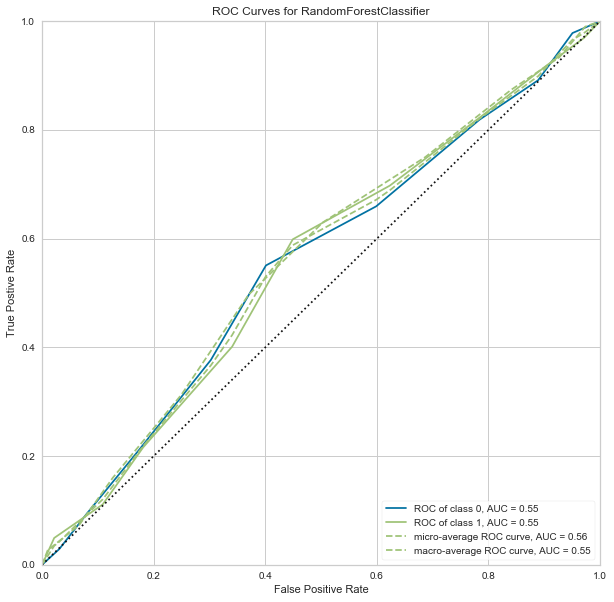

In [55]:
# yellowbrick version
fig, ax = plt.subplots(figsize=(10, 10))
roc_viz = ROCAUC(rf1)
roc_viz.score(X_test, y_test)

roc_viz.poof()

c:\users\johnlee\appdata\local\programs\python\python36\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


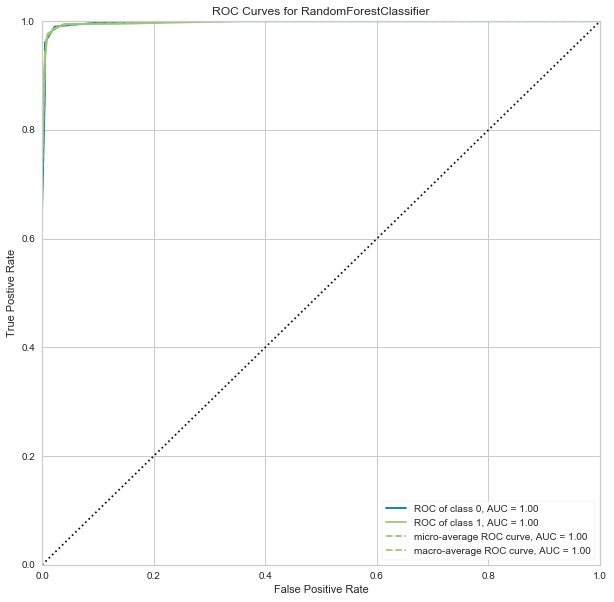

In [56]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
roc_viz = ROCAUC(rf1)
roc_viz.score(X_train, y_train)
roc_viz.poof()